## 17일차 강의 (2021.7.27)
# 머신러닝

### 복습문제
#### 1. 선형회귀를 그래프로 나타낸 경우이다.
- 속성이 하나일때, x축과 y축은 무엇을 나타내는가?
- 속성이 하나일때, 결과의 모양은 ___ 이다.
- 속성이 두개일때, 결과의 모양은 ___ 이다.
- 속성이 세개 이상일때, 결과의 모양은 ___ 이다.

#### 2. 속성이 2개일때, 선형회귀의 방정식을 쓰고 해당하는 신경망 구조로 변환하시오. (방정식의 기호를 신경망에 대응하시오)

#### 3. 행복 데이터에서, GDP 로 기대수명을 예측하는 선형회귀를 적용하고 분석해 보시오. (그래프를 그리고, 가중치 값의 의미 해석 등)
- 'Logged GDP' 가 아닌 실제 GDP 로 위의 결과를 재해석해 보시오.
- 기대수명으로 GDP 를 예측하면 어떻게 되는지 생각해 보시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
X = happy[['Logged GDP per capita']].values
y = happy['Healthy life expectancy'].values

In [5]:
X.shape, y.shape

((149, 1), (149,))

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
w = model.coef_[0]
w

5.01614233919658

In [10]:
b = model.intercept_
b

17.679500487486337

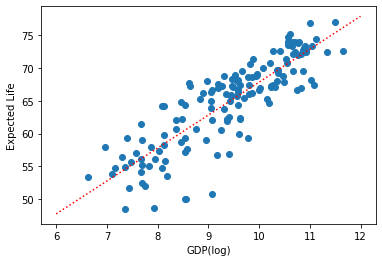

In [15]:
plt.scatter(X[:,0], y)
plt.xlabel('GDP(log)')
plt.ylabel('Expected Life')

xval = np.array([6,12])
yval = xval*w + b
plt.plot(xval, yval, 'r:')
#plt.axis('equal')

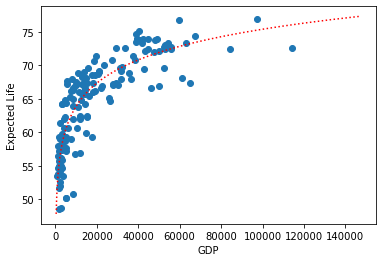

In [17]:
plt.scatter(np.exp(X[:,0]), y)
plt.xlabel('GDP')
plt.ylabel('Expected Life')

xval = np.arange(6,12,0.1)
yval = xval*w + b
plt.plot(np.exp(xval), yval, 'r:')
#plt.axis('equal')

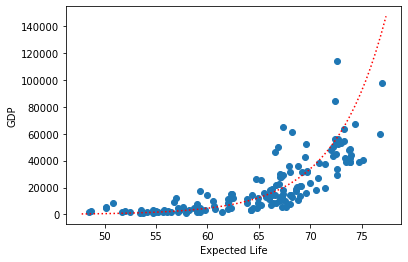

In [19]:
plt.scatter(y, np.exp(X[:,0]))
plt.ylabel('GDP')
plt.xlabel('Expected Life')

xval = np.arange(6,12,0.1)
yval = xval*w + b
plt.plot(yval, np.exp(xval), 'r:')
#plt.axis('equal')

$$ \hat{y} = w x + b $$

In [5]:
w = 1.
b = 1.

In [8]:
pred_y = w * X[:,0] + b

In [9]:
pred_y

array([11.775, 11.933, 12.117, 11.878, 11.932, 12.053, 11.867, 12.647,
       11.643, 11.906, 11.796, 11.575, 11.873, 11.776, 12.342, 10.88 ,
       11.707, 11.556, 12.023, 11.823, 11.704, 11.669, 11.674, 11.871,
       12.085, 11.743, 11.571, 11.623, 11.529, 10.053, 10.966, 12.488,
       10.318, 11.369, 10.577, 10.859, 10.186, 11.499, 11.576, 11.481,
       11.35 ,  9.836, 11.071, 11.382, 11.155, 11.284, 11.817, 10.787,
       10.054, 11.008, 11.315, 10.557, 11.358, 10.805,  9.62 , 11.611,
       10.962, 11.421,  9.648, 11.217, 10.076, 11.651, 10.458, 10.59 ,
       10.454, 10.313,  9.538, 11.279, 10.046, 10.4  , 10.448, 10.94 ,
       10.802, 11.576, 10.853, 11.189, 12.   ,  9.091,  9.973, 10.622,
       11.238, 10.365,  9.117, 10.673,  9.551, 10.487,  9.12 , 11.016,
       10.826, 10.569,  9.189,  9.118, 10.52 , 10.693,  9.58 ,  8.098,
       10.629,  8.686,  9.087,  9.947,  9.454,  8.838, 10.403, 11.24 ,
        9.458,  9.903, 10.073, 10.585, 10.342, 10.436, 10.24 , 10.603,
      

In [10]:
y

array([72.   , 72.7  , 74.4  , 73.   , 72.4  , 73.3  , 72.7  , 72.6  ,
       73.4  , 73.3  , 73.9  , 73.503, 72.5  , 73.8  , 72.4  , 71.4  ,
       72.5  , 70.807, 68.2  , 72.199, 74.   , 69.495, 72.2  , 69.6  ,
       67.333, 66.603, 74.7  , 73.8  , 71.4  , 64.958, 69.1  , 76.953,
       63.813, 69.201, 66.601, 68.597, 67.5  , 67.906, 73.898, 68.8  ,
       69.652, 65.255, 70.   , 69.702, 65.2  , 67.355, 66.9  , 68.6  ,
       66.402, 66.701, 67.1  , 68.001, 68.   , 67.401, 67.657, 75.1  ,
       69.   , 72.6  , 67.3  , 70.799, 62.   , 73.9  , 68.25 , 68.098,
       65.699, 68.8  , 64.401, 72.6  , 63.901, 62.5  , 65.9  , 68.699,
       66.102, 73.898, 66.253, 64.703, 76.82 , 64.281, 68.034, 62.3  ,
       67.102, 62.236, 58.221, 69.593, 50.114, 67.055, 64.233, 67.   ,
       70.6  , 65.656, 53.515, 59.802, 68.999, 65.474, 57.586, 53.78 ,
       62.409, 55.16 , 54.713, 58.968, 64.8  , 55.008, 56.904, 67.199,
       58.709, 66.208, 66.7  , 64.3  , 66.005, 64.902, 60.583, 59.962,
      

In [11]:
error = ((y-pred_y)**2).mean() # Mean Squared Error
error

3010.2332125369126

In [12]:
# 오차를 줄여야 한다.
# w 값을 바꿔보자.
w1 = w-0.1 # 0.9
pred_y = w1*X[:,0] + b
((y-pred_y)**2).mean()

3115.132563164362

In [13]:
w2 = w+0.1 # 1.1
pred_y = w2*X[:,0] + b
((y-pred_y)**2).mean() # w 를 0.1 만큼 증가하면 좋다

2907.139859848926

In [14]:
b1 = b-0.1
pred_y = w*X[:,0] + b1
((y-pred_y)**2).mean()

3021.1553306577184

In [15]:
b1 = b+0.1
pred_y = w*X[:,0] + b1
((y-pred_y)**2).mean() # b를 0.1 만큼 증가하면 좋다

2999.331094416107

In [16]:
w = w+0.1 # 1.1
b = b+0.1 # 1.1

In [17]:
pred_y = w*X[:,0] + b
((y-pred_y)**2).mean()

2896.4263858891945

In [42]:
w = 1.
b = 1.

delta = 0.01
logs = []

pred_y = w * X[:,0] + b
error = ((y-pred_y)**2).mean() # Mean Squared Error
print(error)
logs.append(error)

for epoch in range(10000):
    w_next = w
    b_next = b
    
    w1 = w + delta
    pred_y = w1*X[:,0] + b
    error1 = ((y-pred_y)**2).mean()
    
    w2 = w-delta
    pred_y = w2*X[:,0] + b
    error2 = ((y-pred_y)**2).mean()
    
    if (error1<error) and (error1<=error2):
        w_next = w1
    if (error2<error) and (error2<error1):
        w_next = w2
        
    b1 = b+delta
    pred_y = w*X[:,0] + b1
    error1 = ((y-pred_y)**2).mean()
    
    b2 = b-delta
    pred_y = w*X[:,0] + b2
    error2 = ((y-pred_y)**2).mean()
    
    if (error1<error) and (error1<=error2):
        b_next = b1
    if (error2<error) and (error2<error1):
        b_next = b2
        
    w = w_next
    b = b_next
    pred_y = w * X[:,0] + b
    error = ((y-pred_y)**2).mean()
    
    print('%5d: %.5f, %.5f, %.5f' % (epoch, w, b, error))
    logs.append(error)

3010.2332125369126
    0: 1.01000, 1.01000, 2998.75338
    1: 1.02000, 1.02000, 2987.29558
    2: 1.03000, 1.03000, 2975.85982
    3: 1.04000, 1.04000, 2964.44609
    4: 1.05000, 1.05000, 2953.05439
    5: 1.06000, 1.06000, 2941.68472
    6: 1.07000, 1.07000, 2930.33709
    7: 1.08000, 1.08000, 2919.01149
    8: 1.09000, 1.09000, 2907.70792
    9: 1.10000, 1.10000, 2896.42639
   10: 1.11000, 1.11000, 2885.16688
   11: 1.12000, 1.12000, 2873.92941
   12: 1.13000, 1.13000, 2862.71398
   13: 1.14000, 1.14000, 2851.52058
   14: 1.15000, 1.15000, 2840.34920
   15: 1.16000, 1.16000, 2829.19987
   16: 1.17000, 1.17000, 2818.07256
   17: 1.18000, 1.18000, 2806.96729
   18: 1.19000, 1.19000, 2795.88405
   19: 1.20000, 1.20000, 2784.82285
   20: 1.21000, 1.21000, 2773.78367
   21: 1.22000, 1.22000, 2762.76653
   22: 1.23000, 1.23000, 2751.77142
   23: 1.24000, 1.24000, 2740.79835
   24: 1.25000, 1.25000, 2729.84731
   25: 1.26000, 1.26000, 2718.91830
   26: 1.27000, 1.27000, 2708.01132
   27: 1.

Text(0.5, 0, 'epoch')

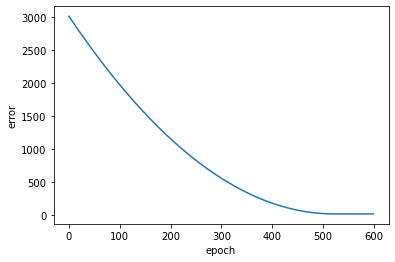

In [47]:
plt.plot(logs[:600])
plt.ylabel('error')
plt.xlabel('epoch')

In [48]:
logs

[3010.2332125369126,
 2998.7533819903683,
 2987.2955843064406,
 2975.8598194851284,
 2964.4460875264326,
 2953.0543884303524,
 2941.6847221968887,
 2930.3370888260415,
 2919.0114883178094,
 2907.707920672194,
 2896.4263858891945,
 2885.1668839688114,
 2873.929414911044,
 2862.713978715893,
 2851.5205753833584,
 2840.349204913439,
 2829.1998673061366,
 2818.07256256145,
 2806.9672906793794,
 2795.884051659925,
 2784.822845503087,
 2773.783672208865,
 2762.766531777259,
 2751.7714242082693,
 2740.7983495018952,
 2729.8473076581377,
 2718.918298676996,
 2708.01132255847,
 2697.1263793025605,
 2686.2634689092674,
 2675.4225913785904,
 2664.6037467105293,
 2653.8069349050847,
 2643.0321559622553,
 2632.2794098820423,
 2621.548696664446,
 2610.8400163094657,
 2600.1533688171007,
 2589.4887541873527,
 2578.8461724202202,
 2568.2256235157042,
 2557.6271074738042,
 2547.0506242945207,
 2536.496173977853,
 2525.963756523801,
 2515.4533719323654,
 2504.965020203546,
 2494.4987013373425,
 2484.054